## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily




---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

# **Stage 1**
***Describe Data***

A brief description of the data, where you sourced it, headers of the data. Summary statistics, charts etc...

If you using data from different sources how you might link them.

https://www.kaggle.com/datasets/gayu14/tv-and-movie-metadata-with-genres-and-ratings-imbd

https://www.kaggle.com/datasets/mohammadrizwansajjad/top-200-movies-of-2023

Two datasets were utilized in this study, both sourced from publicly available repositories on Kaggle. The first dataset contains information about popular movies and TV shows, with key attributes such as movie (title), genre (genres listed as comma-separated strings), runtime, certificate (age rating), rating (IMDb score), stars (main actors), description (plot summary), votes (number of IMDb user votes), and director (filmmaker information). The second dataset captures the box office performance of top films, including columns such as Rank (box office position), Title, Theaters (number of theaters screened), Total Gross (total revenue), Release Date, and Distributor (the company responsible for distribution). Together, these datasets were merged based on movie titles to construct a feature set combining genre information, ratings, and financial performance for predictive modeling.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [40]:
import pandas as pd


imdb_df = pd.read_csv("/content/IMBD.csv")
top_200_df = pd.read_csv("/content/Top_200_Movies_Dataset_2023(Cleaned).csv")

imdb_df.head(), top_200_df.head()

(                                           movie  \
 0                                    The Witcher   
 1  Mission: Impossible - Dead Reckoning Part One   
 2                               Sound of Freedom   
 3                                Secret Invasion   
 4                           Special Ops: Lioness   
 
                                      genre  runtime certificate  rating  \
 0     Action, Adventure, Drama               60 min           A     8.1   
 1  Action, Adventure, Thriller              163 min          UA     8.0   
 2     Action, Biography, Drama              131 min       PG-13     7.9   
 3     Action, Adventure, Drama               47 min      UA 16+     6.2   
 4      Action, Drama, Thriller                  NaN         NaN     7.5   
 
                                                stars  \
 0  ['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...   
 1  ['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...   
 2  ['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam.

# **Stage 2**

Justification for the property that you would like the model to predict.

The goal of this model is to predict a movie's Rank based on its genre combinations. The Rank indicates how well a movie is doing in terms of popularity and box office success compared to other films. Genres play a big role in this because they help determine what kind of audience will be interested in the movie. For example, an Action and Adventure movie may attract a different crowd than a Drama and Romance movie. The combination of genres in a movie can influence how many people want to see it, which ultimately affects its Rank.

By looking at the genre combinations, we aim to understand which types of genres tend to perform better at the box office. For instance, some combinations like Action and Adventure might be more popular and lead to higher rankings, while others may not do as well. This is helpful because it can give filmmakers and studios an idea of which genres might lead to a more successful movie, even before it’s released.



# **Stage 3**

Cleaning the data, linking datasets etc..



In [41]:
top_200_df.columns = top_200_df.columns.str.strip()
imdb_df.columns = imdb_df.columns.str.strip()

In [42]:
merged_df = pd.merge(top_200_df, imdb_df, left_on='Title', right_on='movie', how='inner')

In [43]:
merged_df.columns = merged_df.columns.str.strip()
print(merged_df.columns)

Index(['Rank', 'Title', 'Theaters', 'Total Gross', 'Release Date',
       'Distributor', 'movie', 'genre', 'runtime', 'certificate', 'rating',
       'stars', 'description', 'votes', 'director'],
      dtype='object')


# **Stage 4**
Choose and train Estimator.

The data is first preprocessed to handle the genre feature, where each movie's genre is split into a list of individual genres. These genres are then one-hot encoded -converted into binary columns, allowing the model to treat each genre as a separate feature. The genres_encoded DataFrame is then merged back into the original dataset, ensuring that each movie now has a set of features representing its genre combination.

In [37]:
# Convert genre into a list
merged_df['genre_list'] = merged_df['genre'].apply(lambda x: x.split(','))

# One-hot encode genres
genres_encoded = merged_df['genre_list'].explode().str.strip().str.get_dummies().groupby(level=0).sum()

# Merge the encoded genres back into the original DataFrame
merged_df = merged_df.join(genres_encoded)

In [9]:
# Features: Genre combinations
merged_df = merged_df.dropna(subset=['Rank'])

X = merged_df[genres_encoded.columns.tolist()]

# Target: Ranking
y = merged_df['Rank']

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The Lasso regression model is then applied to predict the movie Rank. Lasso (Least Absolute Shrinkage and Selection Operator) is a form of linear regression that incorporates L1 regularization to prevent overfitting by shrinking some coefficients to zero. This makes Lasso particularly well-suited for datasets with many features, like the one in this case where each genre combination is represented by a separate binary feature. Lasso’s regularization helps reduce the complexity of the model and can improve generalization, especially in high-dimensional datasets.

In [12]:
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=42)

In [13]:
y_pred_lasso = lasso.predict(X_test)

In [14]:
print("Lasso R²:", r2_score(y_test, y_pred_lasso))

Lasso R²: 0.18473279582327007


The R² score is used to evaluate the model’s performance, and in this case, the score of 0.1847 indicates that the model explains about 18.5% of the variance in the movie rankings, suggesting that genre combinations alone are not enough to fully capture the factors affecting a movie's rank. However, the use of Lasso still offers some insight into which genre combinations are most strongly associated with rank, even if its predictive power is somewhat limited by the small sample size and the simplicity of the model.

# **Stage 5**
Evaluate your model and revisit 4...repeat..

Lasso uses the alpha parameter to adjust how much it penalizes the model. A higher alpha means stronger regularization, which pushes more coefficients towards zero. A lower alpha means less regularization, allowing more coefficients to stay in the model.

In [15]:
lasso = Lasso(alpha=0.0001, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, random_state=42)

In [16]:
y_pred_lasso = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))

Lasso R²: 0.18152796390289982


After adjusting the alpha parameter of the Lasso model from 0.01 to 0.001, the R² score declined from 0.184 to 0.181, which is a marginal drop. However, the change is minimal, and the overall performance still suggests that the model is not explaining much of the variance in the rankings (only around 18-19%).

Given that Lasso's performance is still relatively low, and the improvement with different alpha values is minimal

In [17]:
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [18]:
y_pred_lasso = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))

Lasso R²: 0.18182518225803035


After testing the Lasso model, I realized it might not have been the best fit for this problem, mainly because it struggles to capture more complex relationships in the data. To improve the model’s performance, I attempted another model, Gradient Boosting, which is better equipped to handle smaller datasets like ours. Unlike Lasso, which is a linear model, Gradient Boosting can build a series of decision trees, each one focusing on fixing errors from the previous one. This step-by-step approach allows it to capture more intricate patterns and interactions between genre combinations and rankings, even when the dataset is limited. While it might not give perfect results, Gradient Boosting is more flexible and can make the most out of smaller datasets

In [19]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42) #100 decision trees
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test)

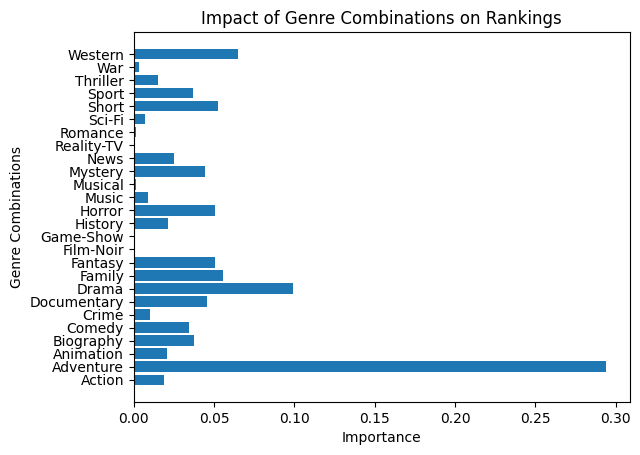

In [21]:
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importance)
plt.xlabel("Importance")
plt.ylabel("Genre Combinations")
plt.title("Impact of Genre Combinations on Rankings")
plt.show()

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.23374665791509497


The R² score of 0.23 indicates that the Gradient Boosting model explains approximately 23% of the variance in movie rankings. While this is still a modest result, it shows an improvement over the Lasso model, which provided an R² score of 0.18. This suggests that Gradient Boosting may have a slightly better ability to predict movie rankings based on genre combinations than Lasso. However, both models still demonstrate relatively low predictive power, likely due to the small dataset size and the complexity of movie rankings, which may involve more factors than genre alone.

**I then adjusted the settings of the Gradient Boosting model to include 500 decision trees (n_estimators=500), a smaller learning rate (learning_rate=0.05) for more gradual improvements, and deeper trees (max_depth=4) to better capture complex patterns. I also applied random sampling (subsample=0.8) to help the model generalize better. These adjustments were made in hopes of enhancing the model’s predictive performance. After fine-tuning these parameters, I retrained the model on the training data and used it to predict the movie rankings.**

In [23]:
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.2297200819586026


The R² score of 0.23 indicates that the model explains approximately 23% of the variation in movie rankings. While this is still a relatively modest result, it represents a noticeable improvement compared to earlier attempts. This suggests that the model is capturing some meaningful patterns related to genre combinations and rankings. However, the score also highlights that genre alone may not be a strong enough predictor of movie rankings. To further improve the model's performance, additional features or more data might be necessary.

**In a last attempt, I adjusted the Gradient Boosting model to make it more powerful. I increased the number of decision trees to 500 and lowered the learning rate to 0.05 for more gradual learning. I also made the trees deeper (max depth of 4) and added random sampling (subsample=0.8) to help the model generalize better. I set the minimum number of samples required to split a tree node to 10, and the minimum samples needed for a leaf to 5, which helps avoid overfitting. Additionally, I limited the number of features used at each split to improve efficiency (max_features='sqrt'). After these adjustments, I retrained the model on the data.**

In [25]:
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=500, random_state=42, subsample=0.8)

In [26]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.22840386941270907


While the improvement is modest, it suggests that the model is starting to capture some useful patterns related to genre combinations and rankings. However, with a score of around 23%, the model's predictive power is still limited. This suggests that genre combinations alone may not be sufficient to accurately predict movie rankings, and additional data or features may be needed to enhance performance further.

Attempting to train the model on more parameters - Runtime, Genre Combination and Certificate

In [54]:
top_200_df.columns = top_200_df.columns.str.strip()
imdb_df.columns = imdb_df.columns.str.strip()
merged_df = pd.merge(top_200_df, imdb_df, left_on='Title', right_on='movie', how='inner')
merged_df.columns = merged_df.columns.str.strip()
print(merged_df.columns)

Index(['Rank', 'Title', 'Theaters', 'Total Gross', 'Release Date',
       'Distributor', 'movie', 'genre', 'runtime', 'certificate', 'rating',
       'stars', 'description', 'votes', 'director'],
      dtype='object')


Similary to the first training, data is first cleaned by removing rows with missing values in essential columns like genre, runtime, certificate, and Rank. The runtime is converted from a string format to a numeric value. Genres are split into lists and one-hot encoded to create binary columns for each unique genre. Similarly, the certificate column is one-hot encoded to represent different content ratings. These processed features — encoded genres, numeric runtime, and certificate indicators — are then combined into a single feature set for model training, with Rank as the target variable.

In [55]:

merged_df = merged_df.dropna(subset=['genre', 'runtime', 'certificate', 'Rank']).copy()

merged_df['runtime'] = merged_df['runtime'].astype(str).str.extract('(\d+)').astype(int)

merged_df['genre_list'] = merged_df['genre'].apply(lambda x: x.split(','))

genres_encoded = merged_df['genre_list'].explode().str.strip().str.get_dummies().groupby(level=0).sum()

certificate_encoded = pd.get_dummies(merged_df['certificate'], prefix='cert', drop_first=True)

X1 = pd.concat([genres_encoded, merged_df[['runtime']], certificate_encoded], axis=1)

y1 = merged_df['Rank']



In [56]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

In [57]:
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)

In [58]:
r2 = r2_score(y_test1, y_pred1)
print("R² Score:", r2)

R² Score: 0.7317302517382573


An R² score of 0.73 demonstrates that the model is able to explain nearly 73% of the variation in movie rankings. This notable increase compared to earlier models indicates that incorporating features like runtime and certificate types alongside genre significantly boosts predictive accuracy. The results suggest the model successfully identifies important relationships within the data.

# **Stage 6**
***Present results and Conclusions***



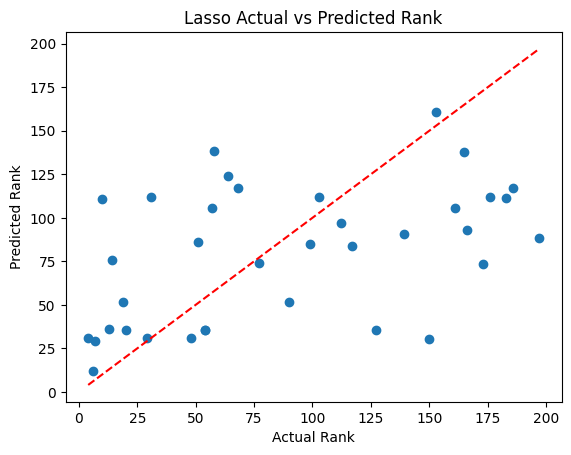

In [ ]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.title("Lasso Actual vs Predicted Rank")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

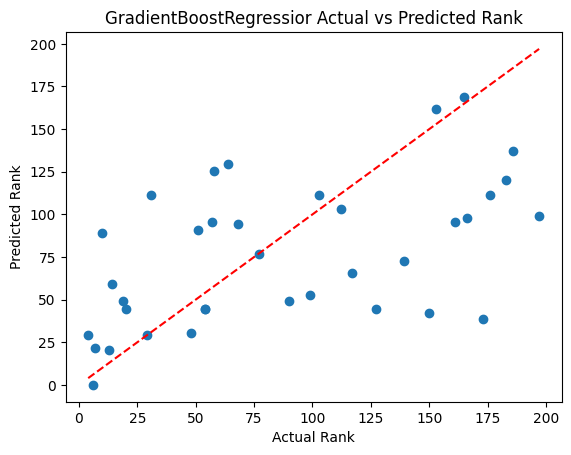

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.title("GradientBoostRegressior Actual vs Predicted Rank")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

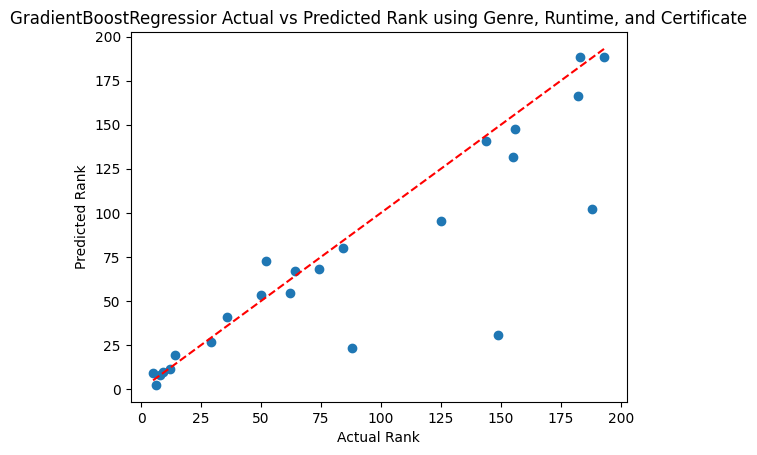

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test1, y_pred1)
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.title("GradientBoostRegressior Actual vs Predicted Rank using Genre, Runtime, and Certificate")
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')
plt.show()

In conclusion, both the Lasso and Gradient Boosting models were evaluated to predict movie rankings based on genre combinations. The Lasso model, a simpler linear approach, achieved an R² score of approximately 0.181, indicating that it could explain around 18% of the variance in the movie rankings. While this result was slightly better than earlier tests, it still reflects a modest level of predictive performance. The simplicity of the Lasso model, combined with the small dataset size, likely limited its ability to capture more complex patterns in the data.

The Gradient Boosting model initially achieved an R² score of approximately 0.229 when using genre combinations alone. However, when the feature set was expanded to include certificate types and runtime—two key attributes that provide context on content classification and movie length—the model's performance improved substantially. With this enhanced feature set, the Gradient Boosting model achieved an R² score of approximately 0.732, indicating that it could now explain over 73% of the variance in movie rankings. This significant improvement highlights the importance of incorporating more informative and diverse features that better reflect the underlying factors influencing movie performance.

This result shows that while complex models like Gradient Boosting can underperform with limited or overly simple inputs, they can deliver strong predictive power when given richer, well-engineered data.